#**주차 수요 예측**
# 단계2 : 탐색적 데이터 분석

## 0.미션

* 단계1 에서 생성한 base_data에 대해서 탐색적 분석을 수행합니다.
* 1) 단변량 분석
    * 숫자형, 범주형 변수에 맞게 데이터를 탐색하며 비즈니스를 파악합니다.
* 2) 이변량 분석
    * Target은 실차량수(숫자) 입니다. 
    * 숫자형 feature --> 숫자형 Target 에 대해 전체 상관계수를 구해 확인합니다.
        * 상관계수가 높은 feature들에 대해 따로 산점도를 그려 확인합니다.
    * 범주형 feature --> 숫자형 Target
        * 평균 비교 barplot(sns.barplot)을 활용하여 비교합니다.
* 3) 전처리 추가 
    * 범주형 feature 중에는 적은 수의 범주가 포함되어 있습니다. 가능한 범주끼리 묶어 봅시다. 

## 1.환경설정

* 세부 요구사항
    - 경로 설정 : 다음의 두가지 방법 중 하나를 선택하여 폴더를 준비하고 데이터를 로딩하시오.
        * 1) 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
        * 2) 구글콜랩
            * 구글 드라이브 바로 밑에 project 폴더를 만들고, 
            * 데이터 파일을 복사해 넣습니다.
    - 라이브러리 설치 및 로딩
        * requirements.txt 파일로 부터 라이브러리 설치
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다. 
        * 필요하다고 판단되는 라이브러리를 추가하세요.


### (1) 한글폰트 설치

In [208]:
# 한글폰트
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

* (구글콜랩) 한글폰트 설치후 런타임 재시작!

### (2) 경로 설정

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [209]:
path = 'C:/Users/User/program/mini_pjt/mini_3/실습파일_에이블러용/데이터/'

#### 2) 구글 콜랩 수행

* 구글 드라이브 연결

In [210]:
# from google.colab import drive
# drive.mount('/content/drive')

In [211]:
# path = '/content/drive/MyDrive/project/'

### (3) 라이브러리 설치 및 불러오기

#### 1) 설치

* requirements.txt 파일을 아래 위치에 두고 다음 코드를 실행하시오.
    * 로컬 : 다음 코드셀 실행
    * 구글콜랩 : requirements.txt 파일을 왼쪽 [파일]탭에 복사해 넣고 다음 코드셀 실행

In [212]:
#!pip install -r requirements.txt

#### 2) 라이브러리 로딩

* **세부 요구사항**
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

# 필요한 라이브러리 로딩
import scipy.stats as spst


In [214]:
# 한글폰트설정
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

### (4) 데이터 불러오기

* **세부 요구사항**
    - 전처리 단계에서 저장한 파일을 불러옵니다.

In [215]:
train = joblib.load(path + 'train2.pkl')
test = joblib.load(path + 'test2.pkl')

In [216]:
fee_deposit = joblib.load(path + 'mean_fee_deposit.pkl')

In [217]:
train

,단지코드,총세대수,전용면적별세대수,지역,준공일자,건물형태,난방방식,승강기설치여부,전용면적,공급면적(공용),임대보증금,임대료,실차량수,총면적
0,C0001,78,35,서울,2013,계단식,개별가스난방,전체동 설치,51.89,19.2603,50758000,620370,109,1816.15
1,C0001,78,43,서울,2013,계단식,개별가스난방,전체동 설치,59.93,22.2446,63166000,665490,109,2576.99
2,C0002,35,26,서울,2013,복도식,개별가스난방,전체동 설치,27.75,16.5375,63062000,458640,35,721.50
3,C0002,35,9,서울,2013,복도식,개별가스난방,전체동 설치,29.08,17.3302,63062000,481560,35,261.72
4,C0003,88,7,서울,2013,계단식,개별가스난방,전체동 설치,59.47,21.9462,72190000,586540,88,416.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1152,C0356,956,956,경기,1994,복도식,지역가스난방,전체동 설치,26.37,12.7500,9931000,134540,243,25209.72
1153,C0358,120,66,강원,2020,복도식,개별난방,전체동 설치,24.83,15.1557,2129000,42350,47,1638.78
1154,C0358,120,54,강원,2020,복도식,개별난방,전체동 설치,33.84,20.6553,2902000,57730,47,1827.36
1155,C0359,447,149,대구경북,1994,복도식,중앙유류난방,전체동 설치,26.37,13.3800,7134000,118880,78,3929.13


In [218]:
fee_deposit

,임대보증금,임대료
단지코드,,
C0001,5.696200e+07,642930.000000
C0002,6.306200e+07,470100.000000
C0003,7.219000e+07,586540.000000
C0004,1.015167e+08,950305.000000
C0006,5.522750e+07,340148.333333
...,...,...
C1341,1.188600e+07,93000.000000
C1354,8.092875e+06,111848.750000
C2307,1.180250e+07,94055.000000


## 2.탐색적 데이터분석

* **세부 요구사항**
    * 기본 분석
        * 기초 통계량, NaN 값 확인 등 기본 분석을 수행합니다.
    * 단변량 분석 
        - 단일 변수로 분석 : 등록차량수, 총세대수, 버스정류장수, 지하철역수, 공가수, 임대료, 보증금
        - 여러 변수를 묶어서 분석 : 건물구분, 공급유형
    * 이변량 분석
        - 전체 상관계수를 구하고 시각화 합니다.
        - 상관계수가 높은 변수에 대한 산점도를 구해봅니다.

### (1) 기본 분석

* **세부 요구사항**
    - 데이터프레임 전체에 대한 기초통계량을 구합니다.
    - NaN을 확인해 봅시다.

In [219]:
train.describe()

,총세대수,전용면적별세대수,전용면적,공급면적(공용),임대보증금,임대료,실차량수,총면적
count,1157.000000,1157.000000,1157.000000,1157.000000,1.157000e+03,1.157000e+03,1157.000000,1157.000000
mean,659.075194,163.691443,51.565584,20.562360,2.850789e+07,2.259409e+05,650.762316,7849.680961
std,456.110643,166.766358,18.243315,5.164405,2.890687e+07,1.768102e+05,390.573462,8153.524826
min,1.000000,1.000000,17.590000,5.850000,0.000000e+00,0.000000e+00,21.000000,21.420000
25%,315.000000,44.000000,39.480000,16.997400,1.379700e+07,1.177400e+05,320.000000,2161.760000
50%,595.000000,112.000000,46.900000,20.384700,1.997300e+07,1.842900e+05,626.000000,5440.400000
75%,918.000000,229.000000,59.810000,23.722500,3.375300e+07,2.634400e+05,894.000000,10489.860000
max,2289.000000,1258.000000,139.350000,42.760000,2.549220e+08,1.058030e+06,1657.000000,63758.740000


In [220]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1157 entries, 0 to 1156
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   단지코드      1157 non-null   object 
 1   총세대수      1157 non-null   int64  
 2   전용면적별세대수  1157 non-null   int64  
 3   지역        1157 non-null   object 
 4   준공일자      1157 non-null   object 
 5   건물형태      1157 non-null   object 
 6   난방방식      1157 non-null   object 
 7   승강기설치여부   1157 non-null   object 
 8   전용면적      1157 non-null   float64
 9   공급면적(공용)  1157 non-null   float64
 10  임대보증금     1157 non-null   int64  
 11  임대료       1157 non-null   int64  
 12  실차량수      1157 non-null   int64  
 13  총면적       1157 non-null   float64
dtypes: float64(3), int64(5), object(6)
memory usage: 126.7+ KB


In [221]:
train.isna().sum()

단지코드        0
총세대수        0
전용면적별세대수    0
지역          0
준공일자        0
건물형태        0
난방방식        0
승강기설치여부     0
전용면적        0
공급면적(공용)    0
임대보증금       0
임대료         0
실차량수        0
총면적         0
dtype: int64

### (2) 단변량 분석



* **세부 요구사항**
    - 주요 변수들의 분포를 살펴보며 비즈니스를 파악합시다.
    - 단일 변수로 분석
        * 대상 : 등록차량수, 총세대수, 버스정류장수, 지하철역수, 공가수, 임대료, 보증금
        * 도구 : 기초통계량, boxplot, histogram 을 통한 데이터 분포 파악
    - 여러 변수를 묶어서 분석 : 전용면적, 건물구분, 공급유형
        * pd.melt를 이용하여 pivot을 해제하고
        * sns.barplot으로 그래프를 그려서 비교해 봅시다. 

In [222]:
train.head(1)

,단지코드,총세대수,전용면적별세대수,지역,준공일자,건물형태,난방방식,승강기설치여부,전용면적,공급면적(공용),임대보증금,임대료,실차량수,총면적
0,C0001,78,35,서울,2013,계단식,개별가스난방,전체동 설치,51.89,19.2603,50758000,620370,109,1816.15


In [223]:
train.columns

Index(['단지코드', '총세대수', '전용면적별세대수', '지역', '준공일자', '건물형태', '난방방식', '승강기설치여부',
       '전용면적', '공급면적(공용)', '임대보증금', '임대료', '실차량수', '총면적'],
      dtype='object')

In [224]:
from sklearn.preprocessing import MinMaxScaler

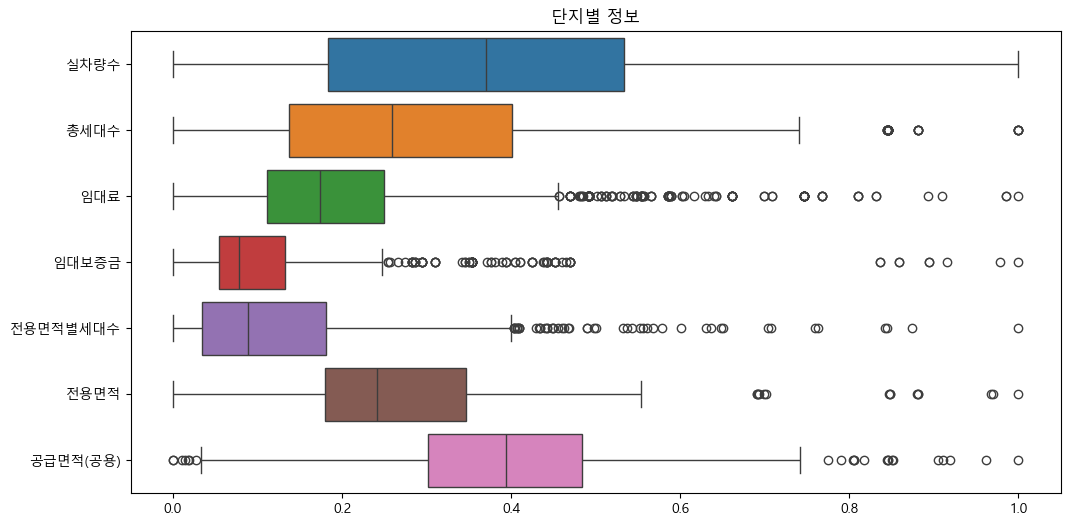

In [225]:
variables = ['실차량수', '총세대수', '임대료', '임대보증금', '전용면적별세대수', '전용면적', '공급면적(공용)']

# Min-Max 스케일링
scaler = MinMaxScaler()

# 스케일링할 변수 선택
scaled_data = train[variables]

# 스케일링 적용
scaled_data = scaler.fit_transform(scaled_data)

# 스케일링된 데이터프레임 생성
scaled_df = pd.DataFrame(scaled_data, columns=variables)

# 상자 그림(boxplot) 출력
plt.figure(figsize=(12, 6))
sns.boxplot(data=scaled_df[variables], orient='h')
plt.title('단지별 정보')
plt.show()

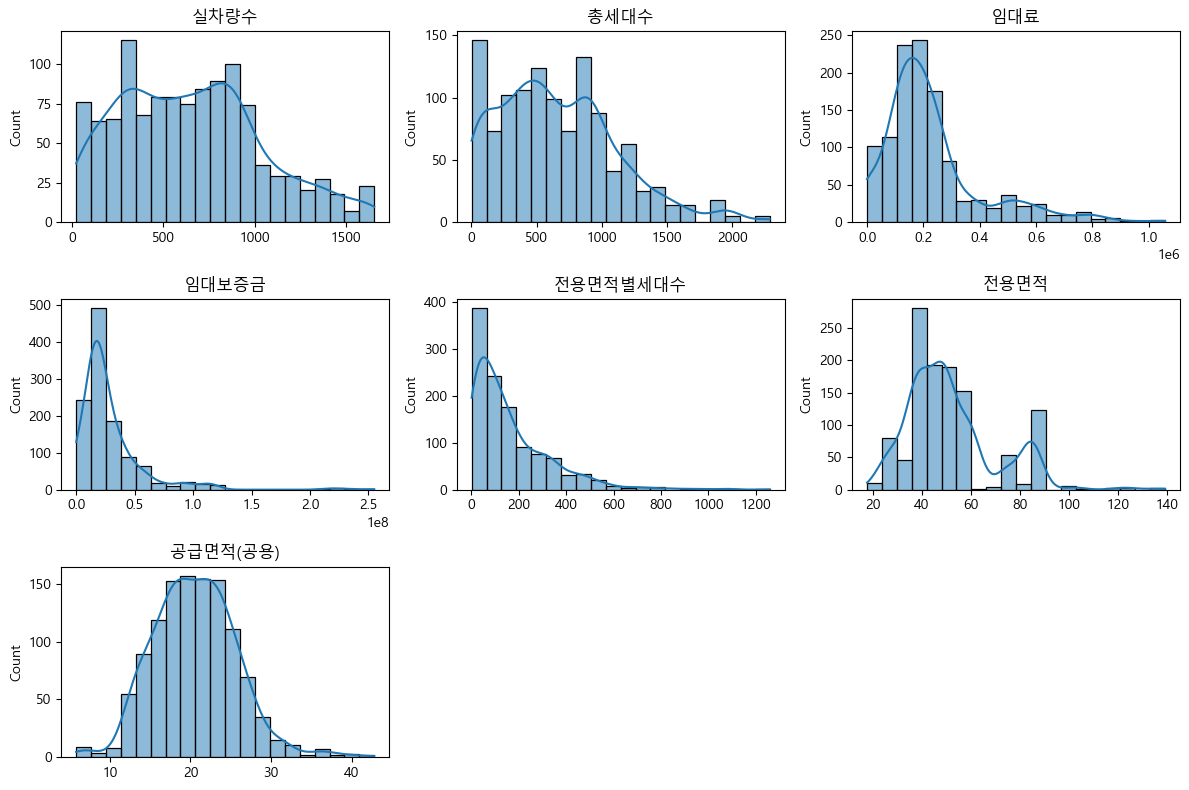

In [226]:
variables = ['실차량수', '총세대수', '임대료', '임대보증금', '전용면적별세대수', '전용면적', '공급면적(공용)']

plt.figure(figsize=(12, 8))
for i, var in enumerate(variables):
    plt.subplot(3, 3, i+1)
    sns.histplot(train[var], bins=20, kde=True)
    plt.title(var)
    plt.xlabel('')
plt.tight_layout()
plt.show()


In [227]:
train.columns

Index(['단지코드', '총세대수', '전용면적별세대수', '지역', '준공일자', '건물형태', '난방방식', '승강기설치여부',
       '전용면적', '공급면적(공용)', '임대보증금', '임대료', '실차량수', '총면적'],
      dtype='object')

C:\Users\User\AppData\Local\Temp\ipykernel_16156\1704110988.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', True)` for the same effect.

  sns.barplot(x='임대료', y='실차량수', data=melted_data, ci=True)


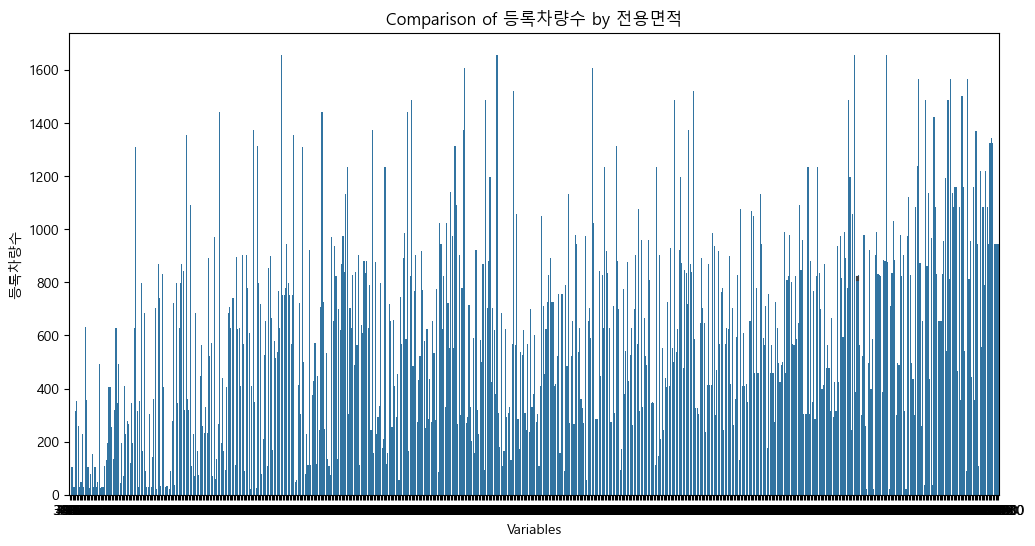

In [228]:
# 전용면적, 건물형태, 공급유형 변수 선택
variables_to_analyze = ['단지코드','전용면적', '건물형태', '공급면적(공용)', '임대보증금', '임대료', '실차량수']

# pivot을 해제하여 데이터 구조 변경
melted_data = train.melt(id_vars=variables_to_analyze)
melted_data

# seaborn의 barplot으로 그래프 그리기
plt.figure(figsize=(12, 6))
sns.barplot(x='임대료', y='실차량수', data=melted_data, ci=True)
plt.title('Comparison of 등록차량수 by 전용면적')
plt.xlabel('Variables')
plt.ylabel('등록차량수')
plt.show()

In [230]:
# # 전용면적 변수 melt
# melted_data = train.melt(id_vars='단지코드', value_vars=['30이하', '40이하', '50이하','60이하', '70이하', '80이하', '90이하', '100이하', '110이하', '120이하', '121이상'],
#                       var_name='전용면적', value_name='세대수')

In [231]:
plt.figure(figsize=(12, 5))
sns.barplot(x='전용면적', y='세대수', data=melted_data, ci=True)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_16156\3183278829.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', True)` for the same effect.

  sns.barplot(x='전용면적', y='세대수', data=melted_data, ci=True)


ValueError: Could not interpret value `세대수` for `y`. An entry with this name does not appear in `data`.

<Figure size 1200x500 with 0 Axes>

### (3) 이변량 분석

* **세부 요구사항**
    - 숫자형 feature --> target
        - 전체 변수들 간의 상관관계 구하기
            * 범주형 변수를 제외한 데이터셋을 이용하여
            * df.corr() + sns.heatmap() 으로 전체 상관계수를 시각화 합니다.
        - 등록차량수와 상관계수가 높은 상위 3~5개에 대해서 산점도를 그려 봅시다.
    - 범주형 feature --> target
        * 지역 : sns.barplot()으로 시각화 해 봅시다.

#### 1) 전체 숫자형 변수들 간의 상관관계

In [232]:
target = '실차량수'

In [233]:
matrix = train.corr(numeric_only=True)

In [234]:
matrix

,총세대수,전용면적별세대수,전용면적,공급면적(공용),임대보증금,임대료,실차량수,총면적
총세대수,1.000000,0.486511,-0.206227,-0.016092,0.067881,0.078974,0.688783,0.416897
전용면적별세대수,0.486511,1.000000,-0.194478,-0.114391,-0.075221,-0.028003,0.294053,0.925144
전용면적,-0.206227,-0.194478,1.000000,0.754058,0.553884,0.478109,0.314336,0.048629
공급면적(공용),-0.016092,-0.114391,0.754058,1.000000,0.516675,0.473151,0.349782,0.074927
임대보증금,0.067881,-0.075221,0.553884,0.516675,1.000000,0.826746,0.350013,0.079327
임대료,0.078974,-0.028003,0.478109,0.473151,0.826746,1.000000,0.325393,0.127850
실차량수,0.688783,0.294053,0.314336,0.349782,0.350013,0.325393,1.000000,0.370919
총면적,0.416897,0.925144,0.048629,0.074927,0.079327,0.127850,0.370919,1.000000


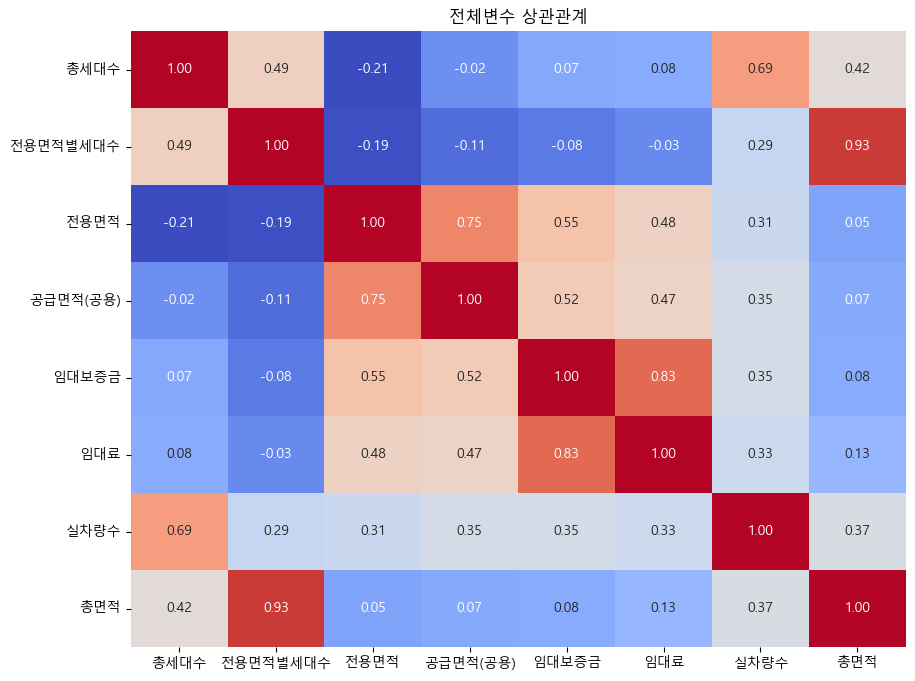

In [235]:
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title('전체변수 상관관계')
plt.show()

#### 2) 숫자형 feature --> 실차량수

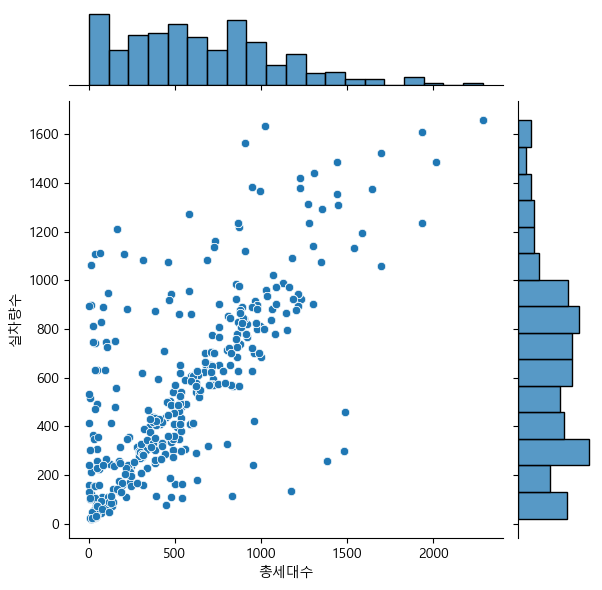

In [236]:
sns.jointplot(x='총세대수', y=target, data=train, kind='scatter')
plt.show()

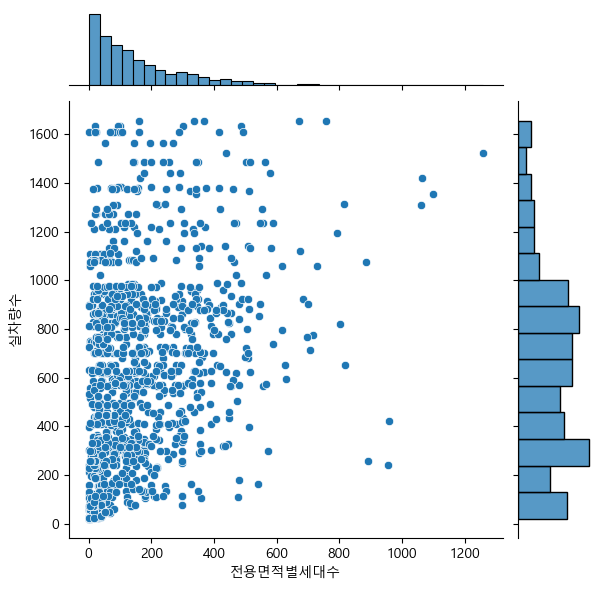

In [237]:
sns.jointplot(x='전용면적별세대수', y=target, data=train, kind='scatter')
plt.show()

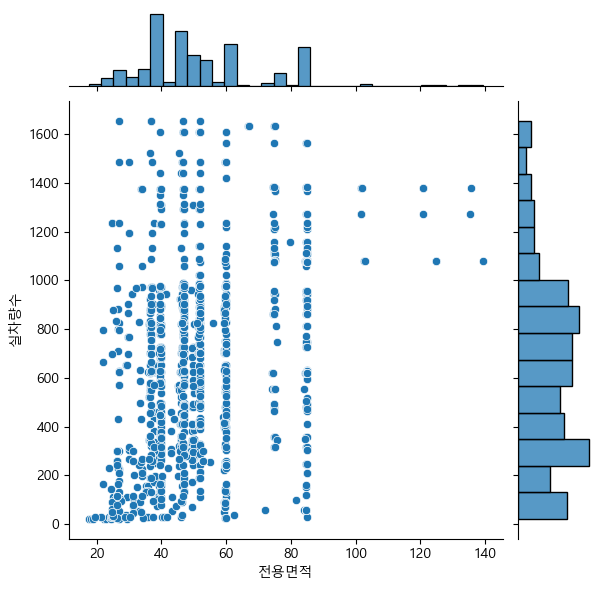

In [238]:
sns.jointplot(x='전용면적', y=target, data=train, kind='scatter')
plt.show()

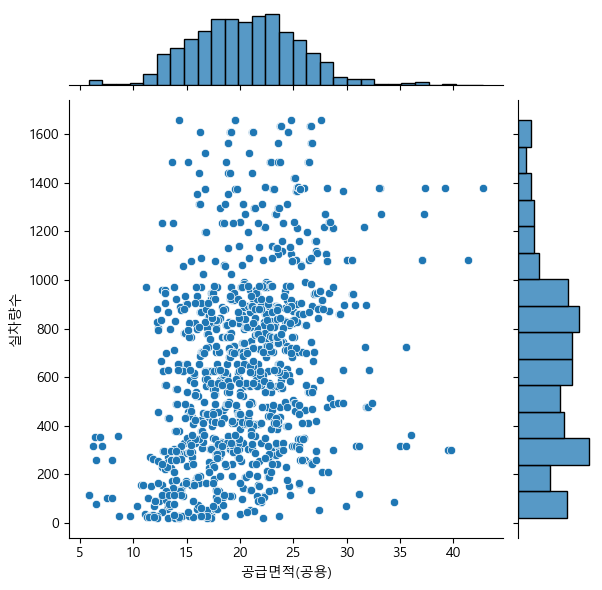

In [239]:
sns.jointplot(x='공급면적(공용)', y=target, data=train, kind='scatter')
plt.show()

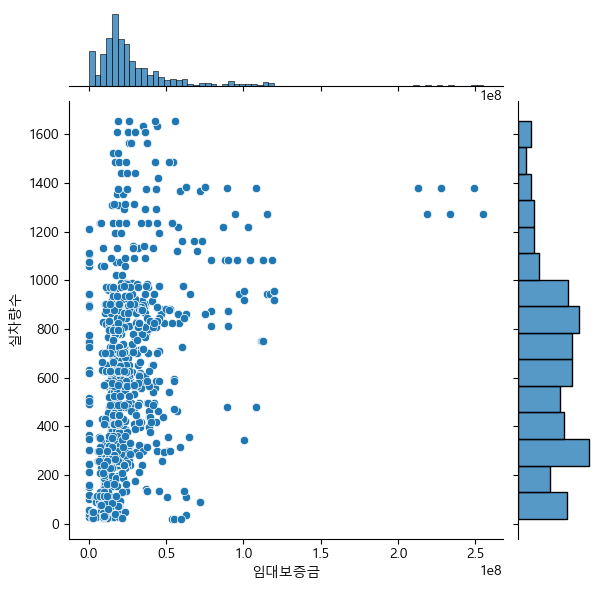

In [240]:
sns.jointplot(x='임대보증금', y=target, data=train, kind='scatter')
plt.show()

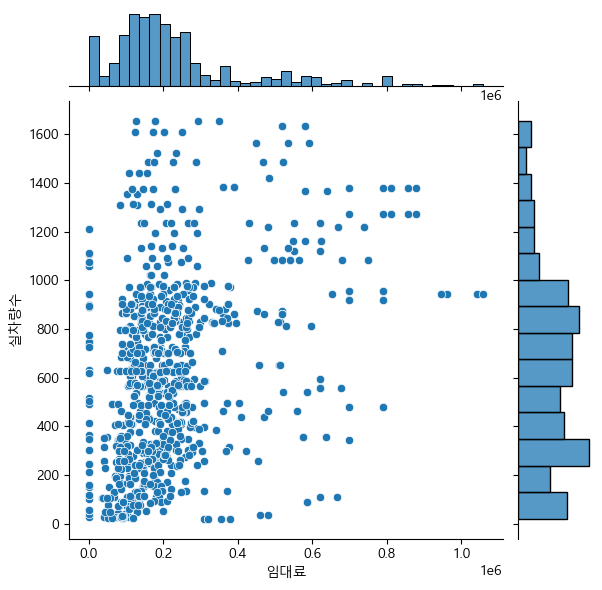

In [241]:
sns.jointplot(x='임대료', y=target, data=train, kind='scatter')
plt.show()

In [242]:
train.columns

Index(['단지코드', '총세대수', '전용면적별세대수', '지역', '준공일자', '건물형태', '난방방식', '승강기설치여부',
       '전용면적', '공급면적(공용)', '임대보증금', '임대료', '실차량수', '총면적'],
      dtype='object')

In [243]:
train['지역'].value_counts()
train['준공일자'].value_counts()
train['난방방식'].value_counts()
train['승강기설치여부'].value_counts()

승강기설치여부
전체동 설치    1128
미설치         18
일부동 설치      11
Name: count, dtype: int64

#### 3) 범주형 feature --> 실차량수

건물형태
계단식    731.869159
복도식    591.167442
혼합식    715.701571
Name: 실차량수, dtype: float64


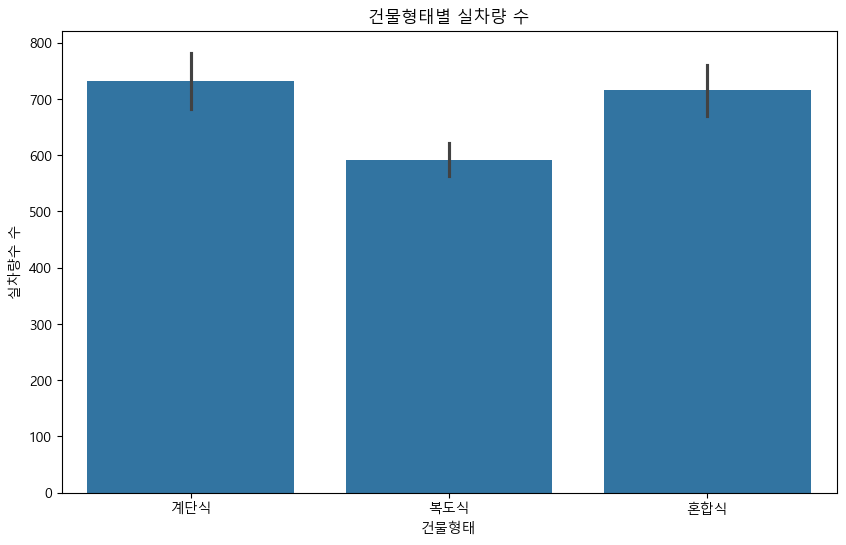

In [244]:
# 건물구분별 실제 차량 수의 평균 계산
mean_actual_cars_by_building_type = train.groupby('건물형태')['실차량수'].mean()

# 결과 출력
print(mean_actual_cars_by_building_type)

# barplot으로 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='건물형태', y='실차량수', data=train)
plt.title('건물형태별 실차량 수')
plt.xlabel('건물형태')
plt.ylabel('실차량수 수')
plt.show()

지역
강원      499.214286
경기      787.931973
경남      569.081633
광주전남    643.789809
대구경북    517.875000
대전충남    538.847619
부산울산    655.881481
서울      777.861111
세종      932.285714
전북      333.058824
제주      342.142857
충북      319.800000
Name: 실차량수, dtype: float64


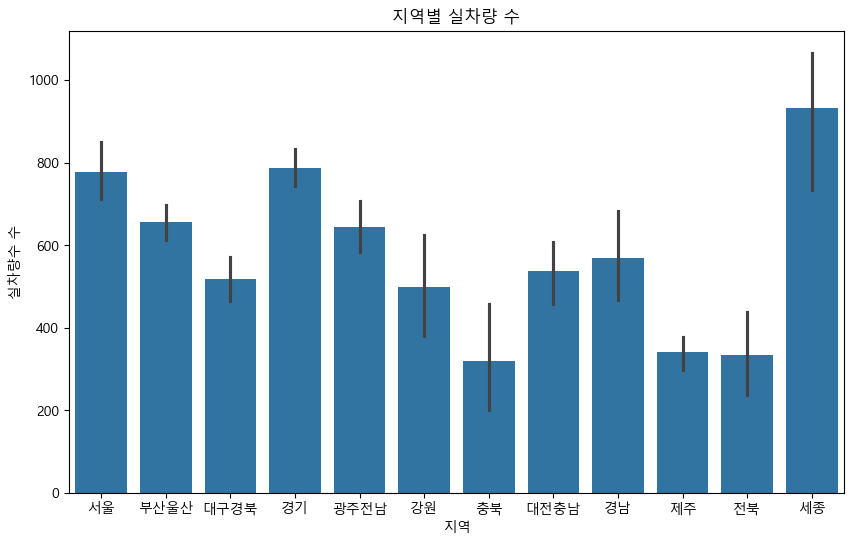

In [245]:
# 지역별 실제 차량 수의 평균 계산
mean_actual_cars_by_building_type = train.groupby('지역')['실차량수'].mean()

# 결과 출력
print(mean_actual_cars_by_building_type)

# barplot으로 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='지역', y='실차량수', data=train)
plt.title('지역별 실차량 수')
plt.xlabel('지역')
plt.ylabel('실차량수 수')
plt.show()

준공일자
1111    645.415385
1900    568.000000
1970    902.000000
1992    307.000000
1993    275.555556
1994    175.692308
1995    279.458333
1996    272.558824
1997    309.400000
1998    332.500000
1999    459.307692
2000    435.636364
2001    465.941176
2002    510.096774
2003    481.047619
2004    620.380952
2005    665.216216
2006    766.750000
2007    515.651515
2008    857.569231
2009    608.463768
2010    768.520000
2011    876.835165
2012    743.613636
2013    702.520548
2014    900.627119
2015    675.363636
2016    743.480769
2017    932.666667
2018    810.789474
2019    177.100000
2020    513.842105
2021    368.818182
2022    303.000000
Name: 실차량수, dtype: float64


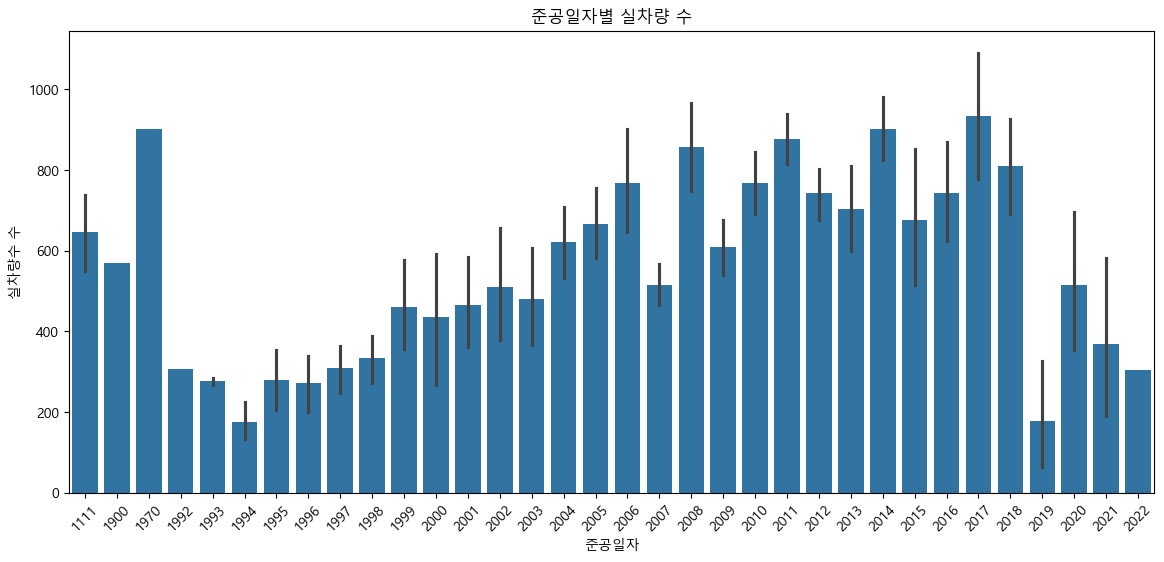

In [246]:
# 준공일자 열을 정수형으로 변환
train['준공일자'] = train['준공일자'].astype(int)
# 준공일자별 실제 차량 수의 평균 계산
mean_actual_cars_by_building_type = train.groupby('준공일자')['실차량수'].mean()

# 결과 출력
print(mean_actual_cars_by_building_type)

ascending_train = train.sort_values(by='준공일자', ascending=True)
# barplot으로 시각화
plt.figure(figsize=(14, 6))
sns.barplot(x='준공일자', y='실차량수', data=ascending_train)
plt.title('준공일자별 실차량 수')
plt.xticks(rotation=45)
plt.xlabel('준공일자')
plt.ylabel('실차량수 수')
plt.show()

난방방식
개별가스난방    533.748239
개별난방      586.733333
개별유류난방    399.000000
중앙가스난방    380.840909
중앙난방      307.727273
중앙유류난방    158.333333
지역가스난방    821.391667
지역난방      857.576577
지역유류난방    301.000000
Name: 실차량수, dtype: float64


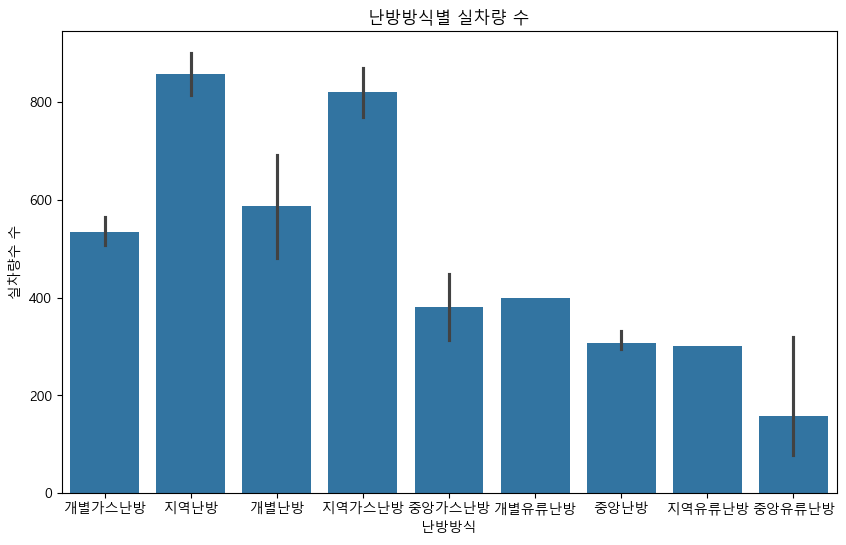

In [247]:
# 난방방식별 실제 차량 수의 평균 계산
mean_actual_cars_by_building_type = train.groupby('난방방식')['실차량수'].mean()

# 결과 출력
print(mean_actual_cars_by_building_type)

# barplot으로 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='난방방식', y='실차량수', data=train)
plt.title('난방방식별 실차량 수')
plt.xlabel('난방방식')
plt.ylabel('실차량수 수')
plt.show()

승강기설치여부
미설치       172.666667
일부동 설치    282.090909
전체동 설치    661.986702
Name: 실차량수, dtype: float64


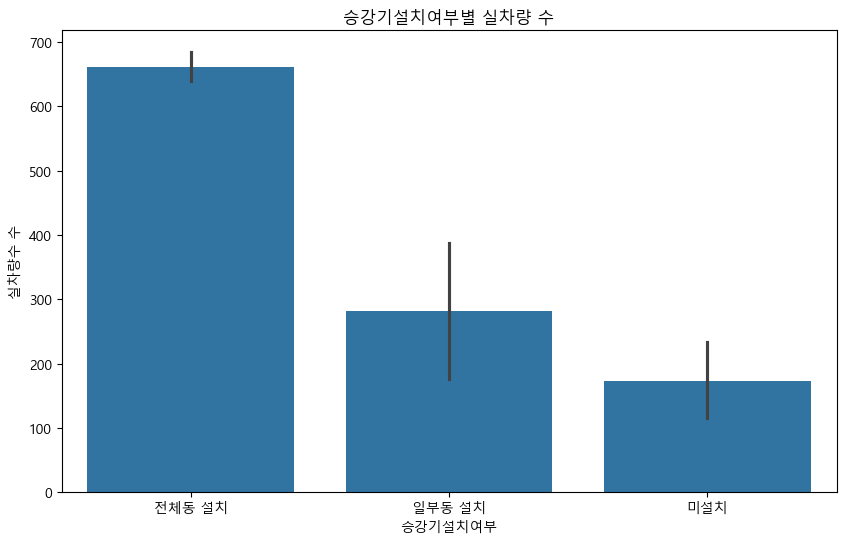

In [248]:
# 승강기설치여부별 실제 차량 수의 평균 계산
mean_actual_cars_by_building_type = train.groupby('승강기설치여부')['실차량수'].mean()

# 결과 출력
print(mean_actual_cars_by_building_type)

# barplot으로 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='승강기설치여부', y='실차량수', data=train)
plt.title('승강기설치여부별 실차량 수')
plt.xlabel('승강기설치여부')
plt.ylabel('실차량수 수')
plt.show()

## 3.전처리_추가

* **세부요구사항**
    * 난방방식, 승강기설치여부 두 변수에 대해서 적은 수의 범주를 묶는 작업을 시도하시오.
    * 지역 : 지역별 특성을 고려하기에는 너무 세분화 되어 있고, 특징으로 통합하기 어려우므로 삭제 합니다.

In [249]:
train.drop('지역', axis=1, inplace=True)

In [250]:
train.head()

,단지코드,총세대수,전용면적별세대수,준공일자,건물형태,난방방식,승강기설치여부,전용면적,공급면적(공용),임대보증금,임대료,실차량수,총면적
0,C0001,78,35,2013,계단식,개별가스난방,전체동 설치,51.89,19.2603,50758000,620370,109,1816.15
1,C0001,78,43,2013,계단식,개별가스난방,전체동 설치,59.93,22.2446,63166000,665490,109,2576.99
2,C0002,35,26,2013,복도식,개별가스난방,전체동 설치,27.75,16.5375,63062000,458640,35,721.50
3,C0002,35,9,2013,복도식,개별가스난방,전체동 설치,29.08,17.3302,63062000,481560,35,261.72
4,C0003,88,7,2013,계단식,개별가스난방,전체동 설치,59.47,21.9462,72190000,586540,88,416.29


In [251]:
# '난방방식' 변수의 고유값 확인
print(train['난방방식'].unique())

# '승강기설치여부' 변수의 고유값 확인
print(train['승강기설치여부'].unique())

['개별가스난방' '지역난방' '개별난방' '지역가스난방' '중앙가스난방' '개별유류난방' '중앙난방' '지역유류난방'
 '중앙유류난방']
['전체동 설치' '일부동 설치' '미설치']


In [252]:
train.isna().sum()

단지코드        0
총세대수        0
전용면적별세대수    0
준공일자        0
건물형태        0
난방방식        0
승강기설치여부     0
전용면적        0
공급면적(공용)    0
임대보증금       0
임대료         0
실차량수        0
총면적         0
dtype: int64

In [253]:
# '난방방식' 변수의 값을 적은 수의 범주로 묶기
train['난방방식'] = train['난방방식'].replace({'개별가스난방': '가스난방',
                                       '중앙가스난방': '가스난방', 
                                       '지역가스난방' : '가스난방',
                                       '개별유류난방': '유류난방', 
                                       '중앙유류난방': '유류난방',
                                       '지역유류난방' : '유류난방',
                                       '개별난방' : '난방',
                                       '지역난방' : '난방',
                                       '중앙난방' : '난방',
                                      })

In [254]:
# '난방방식' 변수의 값을 적은 수의 범주로 묶기
test['난방방식'] = test['난방방식'].replace({'개별가스난방': '가스난방',
                                       '중앙가스난방': '가스난방', 
                                       '지역가스난방' : '가스난방',
                                       '개별유류난방': '유류난방', 
                                       '중앙유류난방': '유류난방',
                                       '지역유류난방' : '유류난방',
                                       '개별난방' : '난방',
                                       '지역난방' : '난방',
                                       '중앙난방' : '난방',
                                      })

In [255]:
#data['난방방식'] = data['난방방식'].str[:2]

In [256]:
train['승강기설치여부'] = train['승강기설치여부'].replace({'전체동 설치': '설치', 
                                                     '일부동 설치': '설치'})

In [257]:
# '난방방식' 변수의 고유값 확인
print(train['난방방식'].unique())
# '승강기설치여부' 변수의 고유값 확인
print(train['승강기설치여부'].unique())

['가스난방' '난방' '유류난방']
['설치' '미설치']


In [258]:
train.columns

Index(['단지코드', '총세대수', '전용면적별세대수', '준공일자', '건물형태', '난방방식', '승강기설치여부', '전용면적',
       '공급면적(공용)', '임대보증금', '임대료', '실차량수', '총면적'],
      dtype='object')

## 4.데이터 저장

* **세부 요구사항**
    * joblib.dump를 이용하시오.
    * 저장할 파일의 확장자는 보통 .pkl 입니다.

In [259]:
train = train.drop(['준공일자', '승강기설치여부'], axis=1)
test = test.drop(['준공일자', '승강기설치여부'], axis=1)

In [260]:
joblib.dump(train, path + 'train2.pkl')

['C:/Users/User/program/mini_pjt/mini_3/실습파일_에이블러용/데이터/train2.pkl']

In [261]:
joblib.dump(test, path + 'test3.pkl')

['C:/Users/User/program/mini_pjt/mini_3/실습파일_에이블러용/데이터/test3.pkl']

In [262]:
test= joblib.load(path + 'test3.pkl')

In [263]:
test['난방방식'].value_counts()

난방방식
가스난방    61
난방      42
유류난방     1
Name: count, dtype: int64

In [264]:
train['난방방식'].value_counts()

난방방식
가스난방    732
난방      419
유류난방      6
Name: count, dtype: int64